Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.


* R&D Spend -- Research and devolop spend in the past few years
* Administration -- spend on administration in the past few years
* Marketing Spend -- spend on Marketing in the past few years
* State -- states from which data is collected
* Profit  -- profit of each state in the past few years


* Loaded startups dataset
* There were 50 observations and 5 features
* Did EDA and Data visualization
* Plotted pairplot and correlation matrix
* It was observed that all the input features were independent of each other.
* Model building and training was done using statsmodel.
* To improve R squared values, outliers were detected using Cook's distance
* outlier was deleted from the dataset and statsmodel1 was trained with this new dataset
* Again to improve R squared outliers was detected and deleted from the dataset
* statsmodel2 was trained with this new dataset
* Finally statsmodel2 was selected as the best model and the profit was predicted


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LinearRegression


In [2]:
startup_ds = pd.read_csv('50_Startups.csv')
startup_ds

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startup_ds = startup_ds.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)

## EDA

In [4]:
startup_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   ADMS    50 non-null     float64
 2   MKTS    50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup_ds.describe(include='all')

,RDS,ADMS,MKTS,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [6]:
startup_ds.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


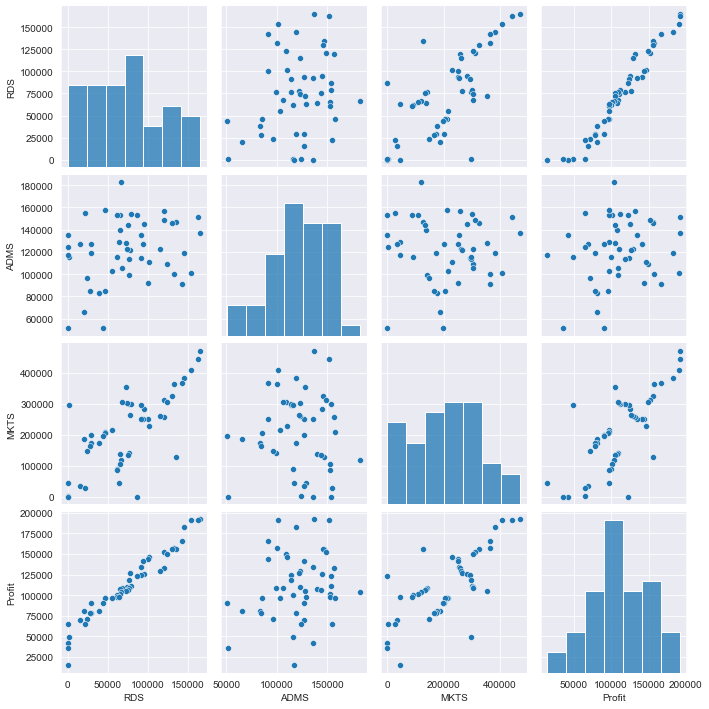

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(startup_ds)

## Model Building - Stats model

In [8]:
statsmodel = smf.ols('Profit~RDS+ADMS+MKTS',data=startup_ds ).fit()
statsmodel.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [9]:
statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           4.53e-30
Time:                        22:29:49   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Detecting outliers -  cook's distance

In [10]:
model_influence = statsmodel.get_influence()
#model_influence.cooks_distance
c,pval = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

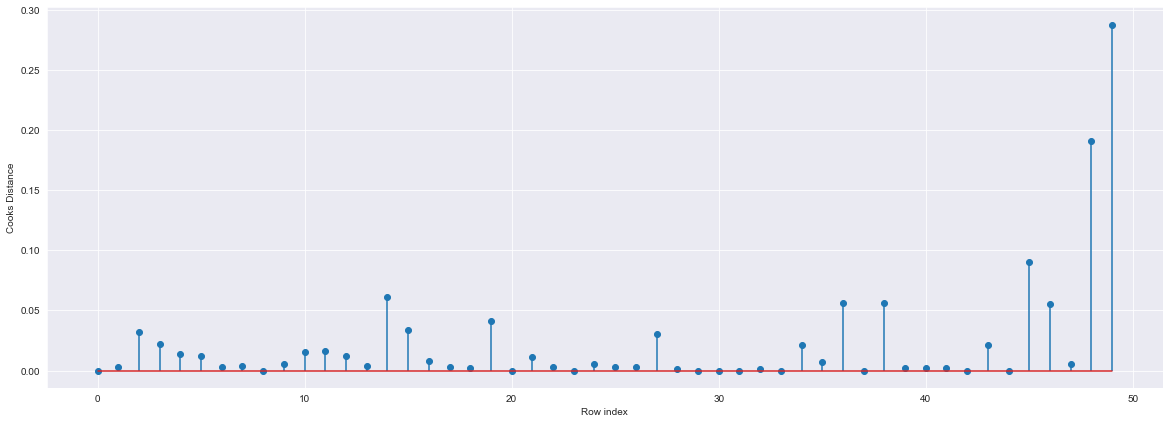

In [11]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_ds)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [12]:
print(np.argmax(c)) # index of influencer
print(np.max(c))    # value of influencer

49
0.2880822927543263


### High Influence point

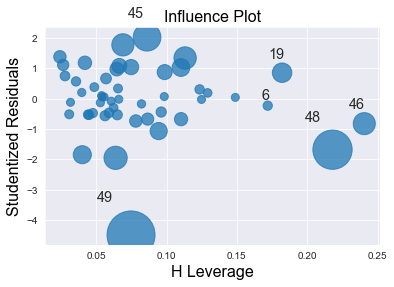

In [13]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(statsmodel)
plt.show()

In [14]:
startup_ds[startup_ds.index.isin([49])]

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [15]:
#Deleting high influencer point at index 80 and reasign the row number (reset_index())
startup_ds1 = startup_ds.drop(startup_ds.index[[49]],axis=0)
print(startup_ds1.shape)
startup_ds1

(49, 5)


,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [16]:
statsmodel1 = smf.ols('Profit~RDS+ADMS+MKTS',data=startup_ds1 ).fit()
statsmodel1.params

Intercept    52382.439251
RDS              0.783002
ADMS            -0.022201
MKTS             0.025234
dtype: float64

In [17]:
statsmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           8.85e-32
Time:                        22:30:08   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
ADMS          -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKTS           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Adj. R-squared:  improved from after deletion of outlier
* 94.8%  to 95.9%

In [18]:
model_influence1 = statsmodel1.get_influence()
#model_influence.cooks_distance
c1,pval1 = model_influence1.cooks_distance
c1

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

In [19]:
startup_ds1.shape

(49, 5)

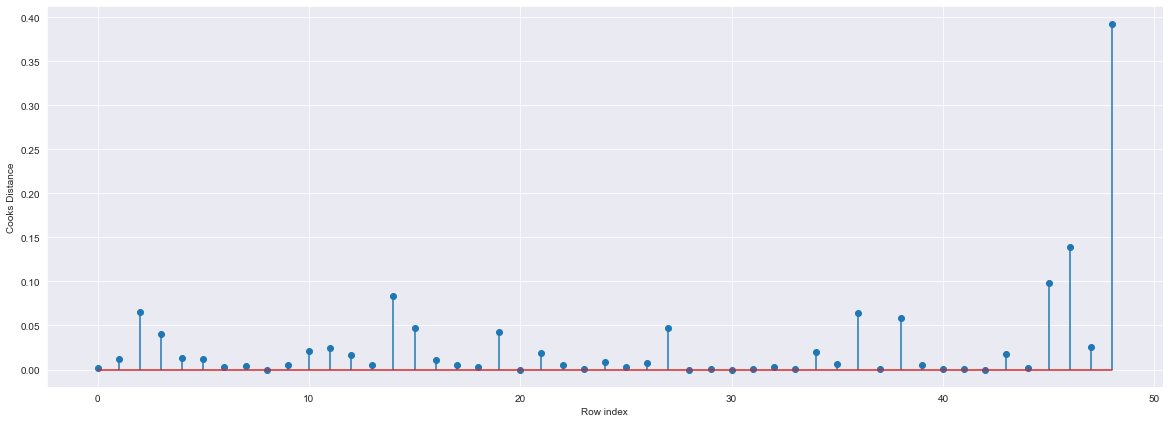

In [20]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_ds1)), np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [21]:
print(np.argmax(c1)) # index of influencer
print(np.max(c1))    # value of influencer

48
0.39274420556321443


### High Influence Points

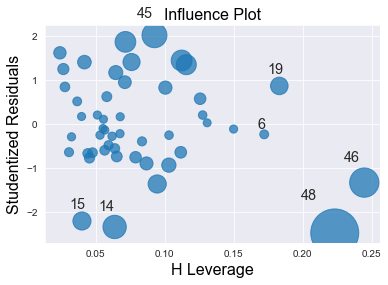

In [22]:
influence_plot(statsmodel1)
plt.show()

In [23]:
startup_ds1[startup_ds1.index.isin([48])]

,RDS,ADMS,MKTS,State,Profit
48,542.05,51743.15,0.0,New York,35673.41


In [24]:
#Deleting high influencer point at index 48
startup_ds2 = startup_ds1.drop(startup_ds1.index[[48]],axis=0)
print(startup_ds2.shape)
startup_ds2

(48, 5)


,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [25]:
statsmodel2 = smf.ols('Profit~RDS+ADMS+MKTS',data=startup_ds2 ).fit()
statsmodel2.params

Intercept    59098.493334
RDS              0.789495
ADMS            -0.063349
MKTS             0.016895
dtype: float64

In [26]:
statsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           2.03e-31
Time:                        22:30:38   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RDS            0.7895      0.036     21.718      0.000       0.716       0.863
ADMS          -0.0633      0.044     -1.442      0.156      -0.152       0.025
MKTS           0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Adj. R-squared:  improved after deletion of outlier
* from 95.9% to 96%
* However, there is not much improvement in Adj. R-squared value . 
* Hence, we will use this model for prediction of price

## Profit Prediction

In [28]:
print(startup_ds2.shape)
predicted_profit = statsmodel2.predict(startup_ds2)
print(type(predicted_profit))
predicted_profit = round(predicted_profit)
predicted_profit = predicted_profit.to_frame('Predicted Profit')
predicted_profit

(48, 5)
<class 'pandas.core.series.Series'>


,Predicted Profit
0,188939.0
1,185379.0
2,180724.0
3,172036.0
4,171688.0
5,163022.0
6,158210.0
7,158221.0
8,150110.0
9,154739.0


In [29]:
final_table  = startup_ds2.copy()
final_table  = pd.concat([final_table,predicted_profit], axis=1)
final_table

,RDS,ADMS,MKTS,State,Profit,Predicted Profit
0,165349.20,136897.80,471784.10,New York,192261.83,188939.0
1,162597.70,151377.59,443898.53,California,191792.06,185379.0
2,153441.51,101145.55,407934.54,Florida,191050.39,180724.0
3,144372.41,118671.85,383199.62,New York,182901.99,172036.0
4,142107.34,91391.77,366168.42,Florida,166187.94,171688.0
5,131876.90,99814.71,362861.36,New York,156991.12,163022.0
6,134615.46,147198.87,127716.82,California,156122.51,158210.0
7,130298.13,145530.06,323876.68,Florida,155752.60,158221.0
8,120542.52,148718.95,311613.29,New York,152211.77,150110.0
9,123334.88,108679.17,304981.62,California,149759.96,154739.0


In [32]:
d = {'Model': ['statsmodel', 'statsmodel1','statsmodel2'], 'R squared value': [0.951,0.961,0.963],
         'Adj. Rsquared value': [0.948,0.959,0.960]}
rsquared_table = pd.DataFrame(data = d)
rsquared_table

,Model,R squared value,Adj. Rsquared value
0,statsmodel,0.951,0.948
1,statsmodel1,0.961,0.959
2,statsmodel2,0.963,0.960
